In [135]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

# Definer variabler og parametre
x, p, a, b, A, B, t = sp.symbols('x p a b A B t')

# faktiske verdier
x_value = 187000  
p_value = 1000    
t_value = 0.12    

# likninger for etterspørsel og tilbud
eq_d = sp.Eq(x, a - b * p)
eq_s = sp.Eq(x, -A + B * p * (1 - t))

# sett inn verdiene for a,p,t
eq_d_sub = eq_d.subs({x: x_value, p: p_value})
eq_s_sub = eq_s.subs({x: x_value, p: p_value, t: t_value})

# løs likningssystem
sol = sp.solve((eq_d_sub, eq_s_sub), (a, b, A, B))

sol

{a: 1000.0*b + 187000.0, A: 880.0*B - 187000.0}

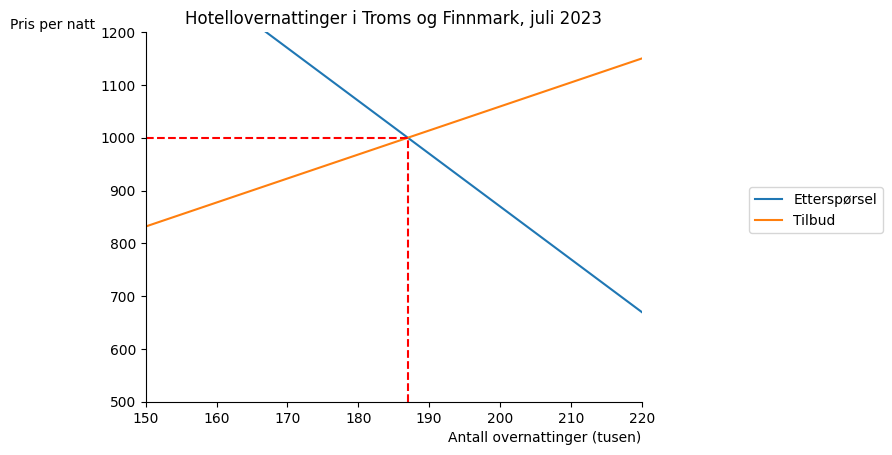

In [136]:
# Etterspørsel i likning (1)

def x_d(p):
    return 287 - 0.1*p

#Tilbud i likning (3)

def x_s(p,t):
    return -33+0.25*p*(1-t)

p_num=np.linspace(0.1,1500,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per natt', loc='top', rotation = 0)
                ax.set_xlabel('Antall overnattinger (tusen)', loc='right')
                ax.set(xlim=(150,220))
                ax.set(ylim=(500,1200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0.12),p_num, label='Tilbud')

ax.hlines(1000, 150, 187, 'r', linestyles='dashed')
ax.vlines(187, 500, 1000, 'r', linestyles = 'dashed')

ax.set_title('Hotellovernattinger i Troms og Finnmark, juli 2023')

ax.legend(bbox_to_anchor=(1.5,0.6));

Tegn inn tilbudsfunksjon uten mva (t=0), og forklar hvorfor tilbudsfunksjonen med mva har brattere helning.

Den har brattere helning fordi mva er en prosentvis økning av prisen, og dermed vil prisen øke mer for hvert produkt som selges.

In [137]:
t_value = 0
# sett inn verdiene for a,p,t
eq_d_sub = eq_d.subs({x: x_value, p: p_value})
eq_s_sub = eq_s.subs({x: x_value, p: p_value, t: t_value})

# løs likningssystem
sol = sp.solve((eq_d_sub, eq_s_sub), (a, b, A, B))

sol

{a: 1000*b + 187000, A: 1000*B - 187000}

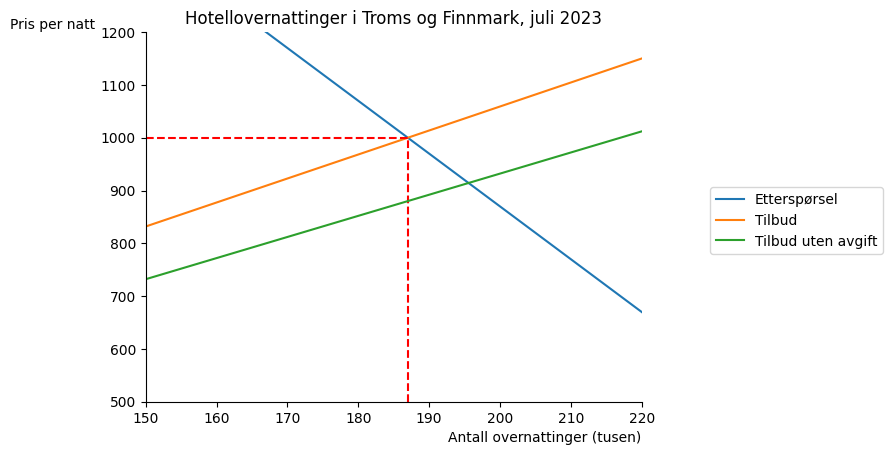

In [138]:

ax.plot(x_s(p_num, 0),p_num, label='Tilbud uten avgift')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Beregn likevektspris og -kvantum uten mva, og vis disse i figuren.

In [139]:
eq_cond=sp.Eq(x_d(p),x_s(p,t))
eq_cond

Eq(287 - 0.1*p, 0.25*p*(1 - t) - 33)

In [140]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

peq_num=p_eq[0].subs(t,0)

In [141]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)
x_eq

xeq_num = x_eq.subs({p:p_eq[0],t:0}) 

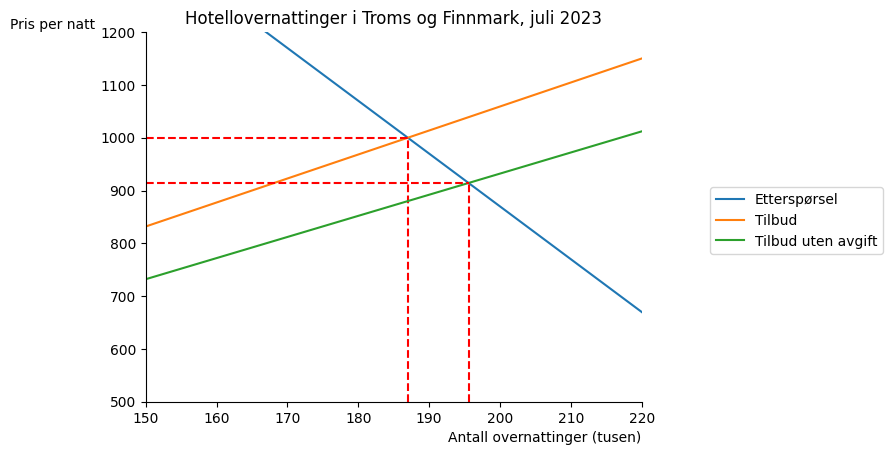

In [142]:
ax.hlines(peq_num, 150, xeq_num, 'r', linestyles='dashed')
ax.vlines(xeq_num, 500, peq_num, 'r', linestyles = 'dashed')
fig

Beregn og vis inntekten til staten fra mva, og andelen som betales av konsumenter og produsenter.

Hva er fordeler/ulemper av en mva og en stykkprisavgift?

In [143]:
inntekt_til_staten = 1000-peq_num

display(float(inntekt_til_staten))

85.71428571428578

Dette blir inntekten til staten og siden avgiften er lagt på tilbudet er det konsumenten som må dekke hele avgiften, mens produsentene betaler 0 kroner på avgiften.

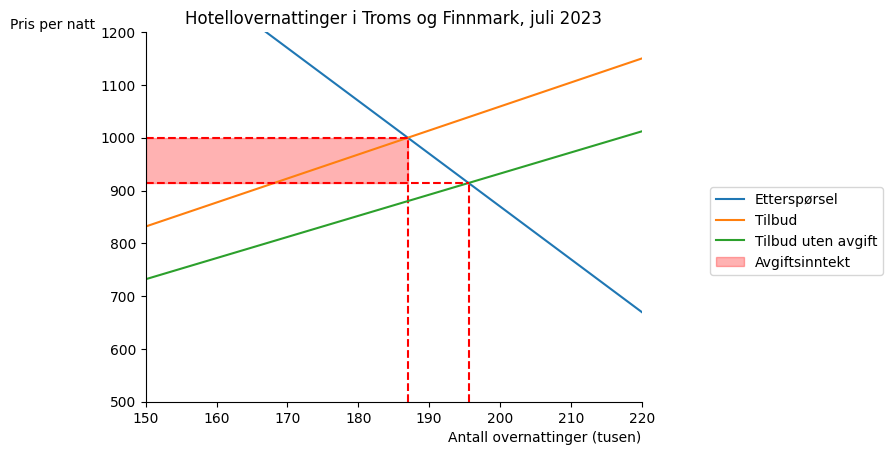

In [144]:
x_space = np.linspace(150, 187, 100)
# Fillbetween
ax.fill_between(x_space, 1000, float(peq_num), color='red', alpha=0.3, label='Avgiftsinntekt')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

(For de ambisiøse). La mva være et tall t mellom 0 og 1. (i) Regn ut hvordan likevektsverdiene på x og p avhenger av t. (ii) Hva er den maksimale verdien på t?. (iii) Finn et uttrykk for myndighetenes proveny som en funksjon av t. (iv) Tegn en figur som viser proveny på den vertikale aksen og t på den horisontale. (v) Finn verdien på t som maksimerer proveny, og vis dette i figuren.